In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# Análisis Exploratorio

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/pokengineer/DataScience/main/datasets/mall_customers.csv')
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Verificamos si hay valores nulos para imputar
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Escalamos las Variables

In [4]:
scaler_X = StandardScaler(with_mean=True, with_std=True)
scaler_X.fit(df.iloc[:,2:5])
X = pd.DataFrame(scaler_X.transform(df.iloc[:,2:5],), columns = df.iloc[:,2:5].columns )

# KMeans

Text(0, 0.5, 'wcss: sum of dist. of sample to their closest cluster center')

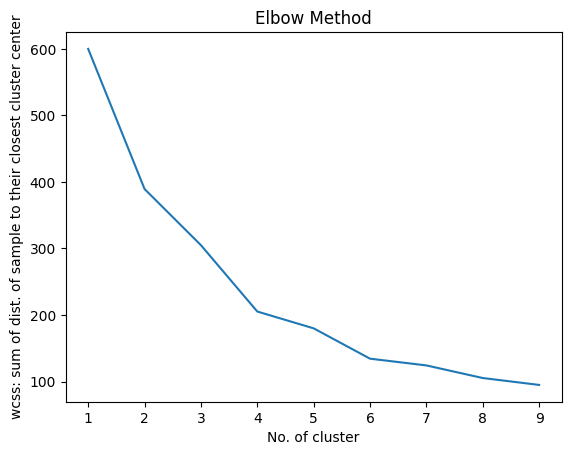

In [5]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,10),wcss)
plt.title('Elbow Method')
plt.xlabel('No. of cluster')
plt.ylabel('wcss: sum of dist. of sample to their closest cluster center' )

In [6]:
kmeans_1=KMeans(n_clusters=5)
kmeans_1.fit(X)
cluster_pred=kmeans_1.predict(X)

<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

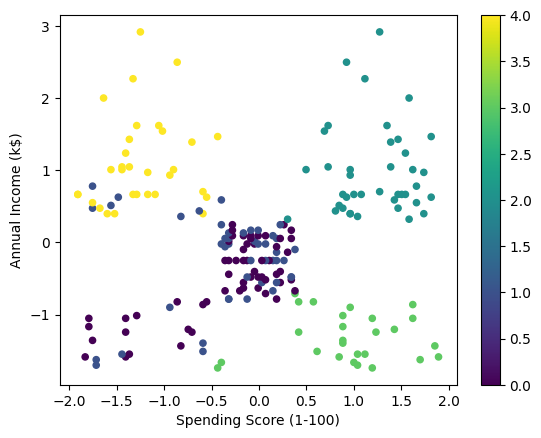

In [7]:
X.plot(x='Spending Score (1-100)', y='Annual Income (k$)',kind='scatter',c=cluster_pred,colormap='viridis')

# DBSCAN

In [8]:
from sklearn.cluster import DBSCAN
dbscan_1 = DBSCAN(eps=0.5, min_samples=5)
dbscan_1.fit(X)
cluster_pred_2 = dbscan_1.labels_.astype(int)

<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

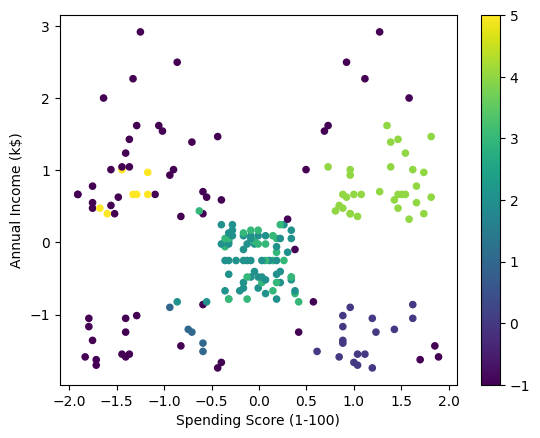

In [9]:
X.plot(x='Spending Score (1-100)', y='Annual Income (k$)',kind='scatter',c=cluster_pred_2,colormap='viridis')

# PCA

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [11]:
pca.components_[0]

array([ 0.70638235, -0.04802398, -0.70619946])

In [51]:
#kmeans_2=KMeans(n_clusters=5)
#kmeans_2.fit(X_pca[:,0:1])
#cluster_pred_3=kmeans_2.predict(X_pca[:,0:1])


dbscan_2 = DBSCAN(eps=0.1, min_samples=5)
dbscan_2.fit(X_pca[:,0:1])
cluster_pred_3 = dbscan_2.labels_.astype(int)

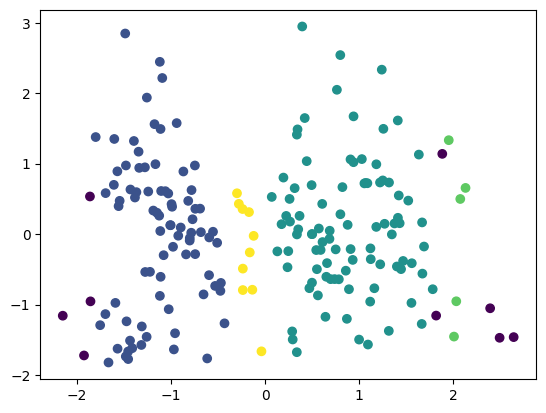

In [52]:
plt.scatter(X_pca[:,0],X_pca[:,1],c=cluster_pred_3,cmap='viridis')

<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

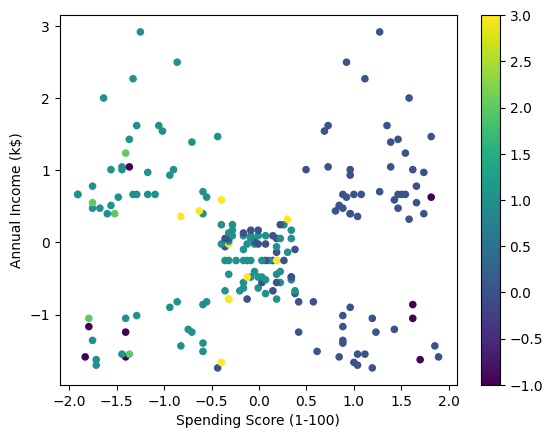

In [53]:
X.plot(x='Spending Score (1-100)', y='Annual Income (k$)',kind='scatter',c=cluster_pred_3,colormap='viridis')

# Clustering Jerarquico

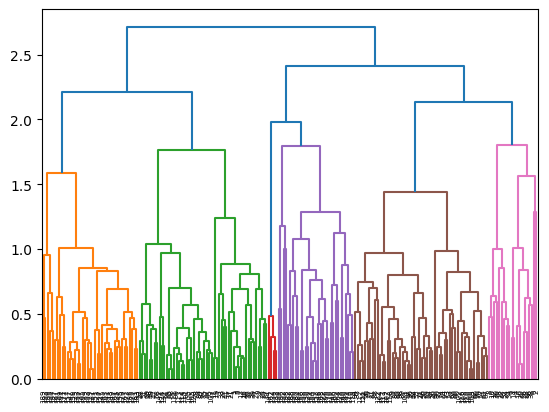

In [15]:
import scipy
from scipy.cluster import hierarchy
linkage = hierarchy.linkage(X, method='average')
cluster_pred_4 = hierarchy.fcluster(linkage, 10 , criterion='maxclust')
dendro=hierarchy.dendrogram( linkage )

<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

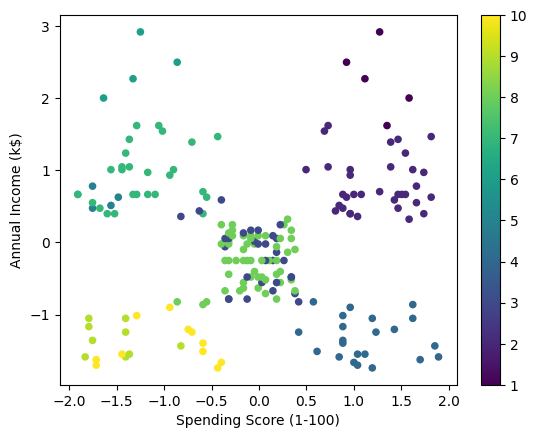

In [16]:
X.plot(x='Spending Score (1-100)', y='Annual Income (k$)',kind='scatter',c=cluster_pred_4,colormap='viridis')

# Ejercicio
Pensar las respuestas y despues probar en el código
- según el método de elbow ¿que otro K podria haber sido bueno para kmeans?
- ¿que pasa si reduzco min_samples en DBSCAN ?
- usando pca.components_[0] ¿podriamos "entender" que representa la primera componente de PCA / escribir la formula para calcularlo? 
- ¿que pasa si uso otro metodo de asociacion para el linkage del clustering jerárquico?
- ¿cómo hago los clusters del clustering jerarquico (fcluster) por distancia y no por numero maximo de clusters?

* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html#scipy.cluster.hierarchy.fcluster